In [94]:
import os
import pandas as pd
import numpy as np
import pylab as py
import warnings
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline as spline
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
from matplotlib.ticker import ScalarFormatter,MaxNLocator,LogLocator,NullFormatter,FuncFormatter
warnings.filterwarnings('ignore')
import matplotlib.font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
from matplotlib.pyplot import gca

In [95]:
pwd = os.getcwd()
path2dat = pwd + '/nTMDs/plots/'
datalst = os.listdir(path2dat+'data_reps/data_rep_000/')

In [96]:
PDF_X00_LOWQ2 = "fort.1"
PDF_X00_HIGHQ2 = "fort.2"

In [97]:
FF_X00_LOWQ2 = "fort.11"
FF_X00_HIGHQ2 = "fort.22"

In [98]:
PDF_KT00_LOWQ2 = "fort.1000"
PDF_KT00_HIGHQ2 = "fort.2000"

In [99]:
FF_PT00_LOWQ2 = "fort.10000"
FF_PT00_HIGHQ2 = "fort.20000"

In [100]:
PDF_X02_LOWQ2 = "fort.101"
PDF_X02_HIGHQ2 = "fort.102"

In [101]:
FF_X03_LOWQ2= "fort.201"
FF_X03_HIGHQ2 = "fort.202"

In [102]:
PDF_X04_LOWQ2 = "fort.301"
PDF_X04_HIGHQ2 = "fort.302"

In [103]:
FF_X05_LOWQ2= "fort.401"
FF_X05_HIGHQ2 = "fort.402"

In [104]:
PDF_X06_LOWQ2 = "fort.501"
PDF_X06_HIGHQ2 = "fort.502"

In [105]:
FF_X07_LOWQ2= "fort.601"
FF_X07_HIGHQ2 = "fort.602"

In [106]:
TMDdatalst = [PDF_X00_LOWQ2,  PDF_X00_HIGHQ2,
              FF_X00_LOWQ2,   FF_X00_HIGHQ2,
              PDF_KT00_LOWQ2, PDF_KT00_HIGHQ2,
              FF_PT00_LOWQ2,  FF_PT00_HIGHQ2,
              PDF_X02_LOWQ2,  PDF_X02_HIGHQ2, 
              FF_X03_LOWQ2,   FF_X03_HIGHQ2, 
              PDF_X04_LOWQ2,  PDF_X04_HIGHQ2,
              FF_X05_LOWQ2, FF_X05_HIGHQ2, 
              PDF_X06_LOWQ2, PDF_X06_HIGHQ2, 
              FF_X07_LOWQ2, FF_X07_HIGHQ2]

In [107]:
up = "up"
u1 = "u1"
u2 = "u2"
ubp = "dp"
ub1 = "d1"
ub2 = "d2"

In [108]:
maxlib = {}
minlib = {}
for _fp in TMDdatalst:
    print(_fp)
    maxlib[_fp] = {}
    minlib[_fp] = {}
    maxlib[_fp][up] = []
    minlib[_fp][up] = []
    maxlib[_fp][u1] = []
    minlib[_fp][u1] = []
    maxlib[_fp][u2] = []
    minlib[_fp][u2] = []
    maxlib[_fp][ubp] = []
    minlib[_fp][ubp] = []
    maxlib[_fp][ub1] = []
    minlib[_fp][ub1] = []
    maxlib[_fp][ub2] = []
    minlib[_fp][ub2] = []
    for j in range(len(pd.read_csv(path2dat+'/data_reps/data_rep_000/'+_fp, delimiter = ',',delim_whitespace=True))):
        for rep in range(101):
            rep = int(rep)
            if rep == 0:
                fp0 = path2dat+'/data_reps/data_rep_000/'+_fp
                df = pd.read_csv(fp0, delimiter = ',',delim_whitespace=True)[j:j+1]
            else:
                if len(str(rep)) == 1:
                    numb = '00'+str(rep)
                elif len(str(rep)) == 2:
                    numb = '0'+str(rep)
                else:
                    numb = str(rep)
                fp1 = path2dat+'/data_reps/data_rep_'+numb+'/'+_fp
                df1 = pd.read_csv(fp1, delimiter = ',',delim_whitespace=True)[j:j+1]
                df = pd.concat([df,df1])
        # u quark from proton
        sortedlst = sorted(df['up'].tolist())
        mean = np.mean(sortedlst)
        std = np.std(sortedlst)
        maxlib[_fp][up].append(mean+std)
        minlib[_fp][up].append(mean-std)
        # u quark from light nucleus (He)
        sortedlst = sorted(df['u1'].tolist())
        mean = np.mean(sortedlst)
        std = np.std(sortedlst)
        maxlib[_fp][u1].append(mean+std)
        minlib[_fp][u1].append(mean-std)
        # u quark from heavy nucleus (Xe)
        sortedlst = sorted(df['u2'].tolist())
        mean = np.mean(sortedlst)
        std = np.std(sortedlst)
        maxlib[_fp][u2].append(mean+std)
        minlib[_fp][u2].append(mean-std)
        sortedlst = sorted(df['dp'].tolist())
        mean = np.mean(sortedlst)
        std = np.std(sortedlst)
        maxlib[_fp][ubp].append(mean+std)
        minlib[_fp][ubp].append(mean-std)
        # u quark from light nucleus (He)
        sortedlst = sorted(df['d1'].tolist())
        mean = np.mean(sortedlst)
        std = np.std(sortedlst)
        maxlib[_fp][ub1].append(mean+std)
        minlib[_fp][ub1].append(mean-std)
        # u quark from heavy nucleus (Xe)
        sortedlst = sorted(df['d2'].tolist())
        mean = np.mean(sortedlst)
        std = np.std(sortedlst)
        maxlib[_fp][ub2].append(mean+std)
        minlib[_fp][ub2].append(mean-std)

fort.1
fort.2
fort.11
fort.22
fort.1000
fort.2000
fort.10000
fort.20000
fort.101
fort.102
fort.201
fort.202
fort.301
fort.302
fort.401
fort.402
fort.501
fort.502
fort.601
fort.602


In [109]:
print('Done!')

Done!


In [110]:
path2dat2 = pwd + '/nTMDs/collinear/plots'
datalst2 = os.listdir(path2dat2+ '/' + 'data_reps/data_rep_000/')

In [111]:
path2dat31 = pwd + '/nTMDs/collinear-FF1/plots'
path2dat32 = pwd + '/nTMDs/collinear-FF2/plots'
path2dat33 = pwd + '/nTMDs/collinear-FF3/plots'
datalst3 = os.listdir(path2dat2+ '/' + 'data_reps/data_rep_000/')

In [112]:
TMDdatalst2 = [PDF_X00_LOWQ2,  PDF_X00_HIGHQ2,
              PDF_KT00_LOWQ2, PDF_KT00_HIGHQ2,
              PDF_X02_LOWQ2,  PDF_X02_HIGHQ2, 
              PDF_X04_LOWQ2,  PDF_X04_HIGHQ2,
              PDF_X06_LOWQ2, PDF_X06_HIGHQ2]

In [113]:
TMDdatalst3 = [FF_X00_LOWQ2,  FF_X00_HIGHQ2,
              FF_PT00_LOWQ2,  FF_PT00_HIGHQ2,
              FF_X03_LOWQ2,   FF_X03_HIGHQ2, 
              FF_X05_LOWQ2,   FF_X05_HIGHQ2, 
              FF_X07_LOWQ2,   FF_X07_HIGHQ2]

In [114]:
errsqu = {}
errsqb = {}
for _fp in TMDdatalst2:
    fp0 = path2dat2+'/data_reps/data_rep_000/'+ _fp
    df0 = pd.read_csv(fp0, delimiter = ',',delim_whitespace=True)
    errsqu[_fp] = {}
    errsqu[_fp][u1] = []
    errsqu[_fp][u2] = []
    errsqb[_fp] = {}
    errsqb[_fp][u1] = []
    errsqb[_fp][u2] = [] 
    for i in range(len(df0)):
        errsqu[_fp][u1].append(0)
        errsqu[_fp][u2].append(0)
        errsqb[_fp][u1].append(0)
        errsqb[_fp][u2].append(0)
    for i in range(48):
        j = 2*(i+1)
        Splus = j
        Sminus = j-1
        #if (_fp == 'fort.1'):
        #    print(Sminus,Splus)
        if len(str(Splus)) == 1:
            numbplus = '00'+str(Splus)
        elif len(str(Splus)) == 2:
            numbplus = '0'+str(Splus)
        else:
            numbplus = str(Splus)
        if len(str(Sminus)) == 1:
            numbminus = '00'+str(Sminus)
        elif len(str(Sminus)) == 2:
            numbminus = '0'+str(Sminus)
        else:
            numbminus = str(Sminus)
        fpp = path2dat2+'/data_reps/data_rep_'+numbplus+'/'+_fp
        dfp = pd.read_csv(fpp, delimiter = ',',delim_whitespace=True)
        fpm = path2dat2+'/data_reps/data_rep_'+numbminus+'/'+_fp
        dfm = pd.read_csv(fpm, delimiter = ',',delim_whitespace=True)
        for k in range(len(dfp)):
                errp = dfp['u1'][k]/dfp['up'][k] -df0['u1'][k]/df0['up'][k]
                errm = dfm['u1'][k]/dfm['up'][k] -df0['u1'][k]/df0['up'][k]
                maxx = np.max([errp,errm,0])
                minn = np.min([errp,errm,0])
                errsqu[_fp][u1][k] = errsqu[_fp][u1][k] + (maxx)**2
                errsqb[_fp][u1][k] = errsqb[_fp][u1][k] + (minn)**2
                errp = dfp['u2'][k]/dfp['up'][k] -df0['u2'][k]/df0['up'][k]
                errm = dfm['u2'][k]/dfm['up'][k] -df0['u2'][k]/df0['up'][k]
                maxx = np.max([errp,errm,0])
                minn = np.min([errp,errm,0])
                errsqu[_fp][u2][k] = errsqu[_fp][u2][k] + (maxx)**2
                errsqb[_fp][u2][k] = errsqb[_fp][u2][k] + (minn)**2
for _fp in TMDdatalst3:
    fp01 = path2dat31+'/data_reps/data_rep_000/'+ _fp
    df01 = pd.read_csv(fp01, delimiter = ',',delim_whitespace=True)
    fp02 = path2dat32+'/data_reps/data_rep_000/'+ _fp
    df02 = pd.read_csv(fp02, delimiter = ',',delim_whitespace=True)
    errsqu[_fp] = {}
    errsqu[_fp][u1] = []
    errsqu[_fp][u2] = []
    errsqb[_fp] = {}
    errsqb[_fp][u1] = []
    errsqb[_fp][u2] = [] 
    for i in range(len(df01)):
        errsqu[_fp][u1].append(0)
        errsqu[_fp][u2].append(0)
        errsqb[_fp][u1].append(0)
        errsqb[_fp][u2].append(0)
    for i in range(7):
        j = i+1
        Splus = j
        Sminus = 7+j
        #if (_fp == 'fort.1'):
        #    print(Sminus,Splus)
        if len(str(Splus)) == 1:
            numbplus = '00'+str(Splus)
        elif len(str(Splus)) == 2:
            numbplus = '0'+str(Splus)
        else:
            numbplus = str(Splus)
        if len(str(Sminus)) == 1:
            numbminus = '00'+str(Sminus)
        elif len(str(Sminus)) == 2:
            numbminus = '0'+str(Sminus)
        else:
            numbminus = str(Sminus)
        #nucleus 1
        fpp1 = path2dat31+'/data_reps/data_rep_'+numbplus+'/'+_fp
        dfp1 = pd.read_csv(fpp1, delimiter = ',',delim_whitespace=True)
        fpm1 = path2dat31+'/data_reps/data_rep_'+numbminus+'/'+_fp
        dfm1 = pd.read_csv(fpm1, delimiter = ',',delim_whitespace=True)
        #nucleus 2
        fpp2 = path2dat32+'/data_reps/data_rep_'+numbplus+'/'+_fp
        dfp2 = pd.read_csv(fpp2, delimiter = ',',delim_whitespace=True)
        fpm2 = path2dat32+'/data_reps/data_rep_'+numbminus+'/'+_fp
        dfm2 = pd.read_csv(fpm2, delimiter = ',',delim_whitespace=True)
        for k in range(len(dfp1)):
                errp = dfp1['u1'][k]/dfp1['up'][k] -df01['u1'][k]/df01['up'][k]
                errm = dfm1['u1'][k]/dfm1['up'][k] -df01['u1'][k]/df01['up'][k]
                maxx = np.max([errp,errm,0])
                minn = np.min([errp,errm,0])
                errsqu[_fp][u1][k] = errsqu[_fp][u1][k] + (maxx)**2
                errsqb[_fp][u1][k] = errsqb[_fp][u1][k] + (minn)**2
                errp = dfp2['u2'][k]/dfp2['up'][k] -df02['u2'][k]/df02['up'][k]
                errm = dfm2['u2'][k]/dfm2['up'][k] -df02['u2'][k]/df02['up'][k]
                maxx = np.max([errp,errm,0])
                minn = np.min([errp,errm,0])
                errsqu[_fp][u2][k] = errsqu[_fp][u2][k] + (maxx)**2
                errsqb[_fp][u2][k] = errsqb[_fp][u2][k] + (minn)**2

In [115]:
errsqv = {}
for _fp in TMDdatalst3:
    if(_fp == 'fort.11'):
        _fpp = 'fort.10'
    else:
        _fpp = _fp
    print(_fp)
    fp01 = path2dat33+'/data_reps/data_rep_000/'+ _fpp
    df01 = pd.read_csv(fp01, delimiter = ',',delim_whitespace=True)
    fp02 = path2dat33+'/data_reps/data_rep_000/'+ _fpp
    df02 = pd.read_csv(fp02, delimiter = ',',delim_whitespace=True)
    errsqv[_fp] = {}
    errsqv[_fp][u1] = []
    errsqv[_fp][u2] = [] 
    for i in range(len(df01)):
        errsqv[_fp][u1].append(0)
        errsqv[_fp][u2].append(0)
    for i in range(28):
        j = i+1
        Splus = j
        Sminus = 28+j
        #if (_fp == 'fort.1'):
        #    print(Sminus,Splus)
        if len(str(Splus)) == 1:
            numbplus = '00'+str(Splus)
        elif len(str(Splus)) == 2:
            numbplus = '0'+str(Splus)
        else:
            numbplus = str(Splus)
        if len(str(Sminus)) == 1:
            numbminus = '00'+str(Sminus)
        elif len(str(Sminus)) == 2:
            numbminus = '0'+str(Sminus)
        else:
            numbminus = str(Sminus)
        #nucleus 1
        fpp1 = path2dat33+'/data_reps/data_rep_'+numbplus+'/'+_fpp
        dfp1 = pd.read_csv(fpp1, delimiter = ',',delim_whitespace=True)
        fpm1 = path2dat33+'/data_reps/data_rep_'+numbminus+'/'+_fpp
        dfm1 = pd.read_csv(fpm1, delimiter = ',',delim_whitespace=True)
        #nucleus 2
        fpp2 = path2dat33+'/data_reps/data_rep_'+numbplus+'/'+_fpp
        dfp2 = pd.read_csv(fpp2, delimiter = ',',delim_whitespace=True)
        fpm2 = path2dat33+'/data_reps/data_rep_'+numbminus+'/'+_fpp
        dfm2 = pd.read_csv(fpm2, delimiter = ',',delim_whitespace=True)
        for k in range(len(dfp1)):
                dfp1.head(10)
                errp = np.abs(dfp1['u1'][k]/dfp1['up'][k] -df01['u1'][k]/df01['up'][k])
                errm = np.abs(dfm1['u1'][k]/dfm1['up'][k] -df01['u1'][k]/df01['up'][k])
                maxx = np.max([errp,errm])
                errsqv[_fp][u1][k] = errsqv[_fp][u1][k] + (maxx)**2
                errp = np.abs(dfp2['u2'][k]/dfp2['up'][k] -df02['u2'][k]/df02['up'][k])
                errm = np.abs(dfm2['u2'][k]/dfm2['up'][k] -df02['u2'][k]/df02['up'][k])
                maxx = np.max([errp,errm])
                errsqv[_fp][u2][k] = errsqv[_fp][u2][k] + (maxx)**2

fort.11
fort.22
fort.10000
fort.20000
fort.201
fort.202
fort.401
fort.402
fort.601
fort.602


In [116]:
errsqu = {}
errsqb = {}
for _fp in TMDdatalst2:
    fp0 = path2dat2+'/data_reps/data_rep_000/'+ _fp
    df0 = pd.read_csv(fp0, delimiter = ',',delim_whitespace=True)
    errsqu[_fp] = {}
    errsqu[_fp][u1] = []
    errsqu[_fp][u2] = []
    errsqb[_fp] = {}
    errsqb[_fp][u1] = []
    errsqb[_fp][u2] = [] 
    for i in range(len(df0)):
        errsqu[_fp][u1].append(0)
        errsqu[_fp][u2].append(0)
        errsqb[_fp][u1].append(0)
        errsqb[_fp][u2].append(0)
    for i in range(48):
        j = 2*(i+1)
        Splus = j
        Sminus = j-1
        #if (_fp == 'fort.1'):
        #    print(Sminus,Splus)
        if len(str(Splus)) == 1:
            numbplus = '00'+str(Splus)
        elif len(str(Splus)) == 2:
            numbplus = '0'+str(Splus)
        else:
            numbplus = str(Splus)
        if len(str(Sminus)) == 1:
            numbminus = '00'+str(Sminus)
        elif len(str(Sminus)) == 2:
            numbminus = '0'+str(Sminus)
        else:
            numbminus = str(Sminus)
        fpp = path2dat2+'/data_reps/data_rep_'+numbplus+'/'+_fp
        dfp = pd.read_csv(fpp, delimiter = ',',delim_whitespace=True)
        fpm = path2dat2+'/data_reps/data_rep_'+numbminus+'/'+_fp
        dfm = pd.read_csv(fpm, delimiter = ',',delim_whitespace=True)
        for k in range(len(dfp)):
                errp = dfp['u1'][k]/dfp['up'][k] -df0['u1'][k]/df0['up'][k]
                errm = dfm['u1'][k]/dfm['up'][k] -df0['u1'][k]/df0['up'][k]
                maxx = np.max([errp,errm,0])
                minn = np.min([errp,errm,0])
                errsqu[_fp][u1][k] = errsqu[_fp][u1][k] + (maxx)**2
                errsqb[_fp][u1][k] = errsqb[_fp][u1][k] + (minn)**2
                errp = dfp['u2'][k]/dfp['up'][k] -df0['u2'][k]/df0['up'][k]
                errm = dfm['u2'][k]/dfm['up'][k] -df0['u2'][k]/df0['up'][k]
                maxx = np.max([errp,errm,0])
                minn = np.min([errp,errm,0])
                errsqu[_fp][u2][k] = errsqu[_fp][u2][k] + (maxx)**2
                errsqb[_fp][u2][k] = errsqb[_fp][u2][k] + (minn)**2
for _fp in TMDdatalst3:
    fp01 = path2dat31+'/data_reps/data_rep_000/'+ _fp
    df01 = pd.read_csv(fp01, delimiter = ',',delim_whitespace=True)
    fp02 = path2dat32+'/data_reps/data_rep_000/'+ _fp
    df02 = pd.read_csv(fp02, delimiter = ',',delim_whitespace=True)
    errsqu[_fp] = {}
    errsqu[_fp][u1] = []
    errsqu[_fp][u2] = []
    errsqb[_fp] = {}
    errsqb[_fp][u1] = []
    errsqb[_fp][u2] = [] 
    for i in range(len(df01)):
        errsqu[_fp][u1].append(0)
        errsqu[_fp][u2].append(0)
        errsqb[_fp][u1].append(0)
        errsqb[_fp][u2].append(0)
    for i in range(7):
        j = i+1
        Splus = j
        Sminus = 7+j
        #if (_fp == 'fort.1'):
        #    print(Sminus,Splus)
        if len(str(Splus)) == 1:
            numbplus = '00'+str(Splus)
        elif len(str(Splus)) == 2:
            numbplus = '0'+str(Splus)
        else:
            numbplus = str(Splus)
        if len(str(Sminus)) == 1:
            numbminus = '00'+str(Sminus)
        elif len(str(Sminus)) == 2:
            numbminus = '0'+str(Sminus)
        else:
            numbminus = str(Sminus)
        #nucleus 1
        fpp1 = path2dat31+'/data_reps/data_rep_'+numbplus+'/'+_fp
        dfp1 = pd.read_csv(fpp1, delimiter = ',',delim_whitespace=True)
        fpm1 = path2dat31+'/data_reps/data_rep_'+numbminus+'/'+_fp
        dfm1 = pd.read_csv(fpm1, delimiter = ',',delim_whitespace=True)
        #nucleus 2
        fpp2 = path2dat32+'/data_reps/data_rep_'+numbplus+'/'+_fp
        dfp2 = pd.read_csv(fpp2, delimiter = ',',delim_whitespace=True)
        fpm2 = path2dat32+'/data_reps/data_rep_'+numbminus+'/'+_fp
        dfm2 = pd.read_csv(fpm2, delimiter = ',',delim_whitespace=True)
        for k in range(len(dfp1)):
                errp = dfp1['u1'][k]/dfp1['up'][k] -df01['u1'][k]/df01['up'][k]
                errm = dfm1['u1'][k]/dfm1['up'][k] -df01['u1'][k]/df01['up'][k]
                maxx = np.max([errp,errm,0])
                minn = np.min([errp,errm,0])
                errsqu[_fp][u1][k] = errsqu[_fp][u1][k] + (maxx)**2
                errsqb[_fp][u1][k] = errsqb[_fp][u1][k] + (minn)**2
                errp = dfp2['u2'][k]/dfp2['up'][k] -df02['u2'][k]/df02['up'][k]
                errm = dfm2['u2'][k]/dfm2['up'][k] -df02['u2'][k]/df02['up'][k]
                maxx = np.max([errp,errm,0])
                minn = np.min([errp,errm,0])
                errsqu[_fp][u2][k] = errsqu[_fp][u2][k] + (maxx)**2
                errsqb[_fp][u2][k] = errsqb[_fp][u2][k] + (minn)**2

In [117]:
maxrat = {}
minrat = {}
for _fp in TMDdatalst2:
    maxrat[_fp] = {}
    minrat[_fp] = {}
    maxrat[_fp][u1] = []
    minrat[_fp][u1] = []
    maxrat[_fp][u2] = []
    minrat[_fp][u2] = []
    print(_fp)
    maxx_u1 = maxlib[_fp][u1]
    minn_u1 = minlib[_fp][u1]
    maxx_u2 = maxlib[_fp][u2]
    minn_u2 = minlib[_fp][u2]
    maxx_proton = maxlib[_fp][up]
    minn_proton = minlib[_fp][up]
    ratio_max_u1 = []
    ratio_min_u1 = []
    ratio_max_u2 = []
    ratio_min_u2 = []
    for i in range(len(maxx_u1)):
        ratio_max_u1.append(maxx_u1[i]/maxx_proton[i])
        ratio_min_u1.append(minn_u1[i]/minn_proton[i]) 
        ratio_max_u2.append(maxx_u2[i]/maxx_proton[i])
        ratio_min_u2.append(minn_u2[i]/minn_proton[i]) 
    fp0 = path2dat2+'/data_reps/data_rep_000/'+ _fp
    df0 = pd.read_csv(fp0, delimiter = ',',delim_whitespace=True)
    centralrat_u1 = (df0['u1']/df0['up'])
    centralrat_u2 = (df0['u2']/df0['up'])
    for i in range(len(maxx_u1)):
        ERR_U1P = np.sqrt( (np.sqrt(errsqu[_fp][u1][i])/(1.645))**2 + (( ratio_max_u1[i] - ratio_min_u1[i])/2 )**2 )
        ERR_U1M = np.sqrt( (np.sqrt(errsqb[_fp][u1][i])/(1.645))**2 + (( ratio_max_u1[i] - ratio_min_u1[i])/2 )**2 )
        ERR_U2P = np.sqrt( (np.sqrt(errsqu[_fp][u2][i])/(1.645))**2 + (( ratio_max_u2[i] - ratio_min_u2[i])/2 )**2 )
        ERR_U2M = np.sqrt( (np.sqrt(errsqb[_fp][u2][i])/(1.645))**2 + (( ratio_max_u2[i] - ratio_min_u2[i])/2 )**2 )
        maxrat[_fp][u1].append(centralrat_u1[i] + ERR_U1P)
        minrat[_fp][u1].append(centralrat_u1[i] - ERR_U1M)
        maxrat[_fp][u2].append(centralrat_u2[i] + ERR_U2P)
        minrat[_fp][u2].append(centralrat_u2[i] - ERR_U2M)    
for _fp in TMDdatalst3:
    maxrat[_fp] = {}
    minrat[_fp] = {}
    maxrat[_fp][u1] = []
    minrat[_fp][u1] = []
    maxrat[_fp][u2] = []
    minrat[_fp][u2] = []
    print(_fp)
    maxx_u1 = maxlib[_fp][u1]
    minn_u1 = minlib[_fp][u1]
    maxx_u2 = maxlib[_fp][u2]
    minn_u2 = minlib[_fp][u2]
    maxx_proton = maxlib[_fp][up]
    minn_proton = minlib[_fp][up]
    ratio_max_u1 = []
    ratio_min_u1 = []
    ratio_max_u2 = []
    ratio_min_u2 = []
    for i in range(len(maxx_u1)):
        ratio_max_u1.append(maxx_u1[i]/maxx_proton[i])
        ratio_min_u1.append(minn_u1[i]/minn_proton[i]) 
        ratio_max_u2.append(maxx_u2[i]/maxx_proton[i])
        ratio_min_u2.append(minn_u2[i]/minn_proton[i]) 
    fp01 = path2dat31+'/data_reps/data_rep_000/'+ _fp
    df01 = pd.read_csv(fp01, delimiter = ',',delim_whitespace=True)
    fp02 = path2dat32+'/data_reps/data_rep_000/'+ _fp
    df02 = pd.read_csv(fp02, delimiter = ',',delim_whitespace=True)
    centralrat_u1 = (df01['u2']/df01['up'])
    centralrat_u2 = (df02['u2']/df02['up'])
    for i in range(len(maxx_u1)):
        ERR_U1P = np.sqrt( errsqu[_fp][u1][i] + errsqv[_fp][u1][i] +  ( ( ratio_max_u1[i] - ratio_min_u1[i])/2 )**2)
        ERR_U1M = np.sqrt( errsqb[_fp][u1][i] + errsqv[_fp][u1][i] + ( ( ratio_max_u1[i] - ratio_min_u1[i])/2 )**2)
        ERR_U2P = np.sqrt( errsqu[_fp][u2][i] + errsqv[_fp][u2][i] + ( ( ratio_max_u2[i] - ratio_min_u2[i])/2 )**2)
        ERR_U2P = np.sqrt( errsqb[_fp][u2][i] + errsqv[_fp][u2][i]  +( ( ratio_max_u2[i] - ratio_min_u2[i])/2 )**2)
        maxrat[_fp][u1].append(centralrat_u1[i] + ERR_U1P)
        minrat[_fp][u1].append(centralrat_u1[i] - ERR_U1M)
        maxrat[_fp][u2].append(centralrat_u2[i] + ERR_U2P)
        minrat[_fp][u2].append(centralrat_u2[i] - ERR_U2M)

fort.1
fort.2
fort.1000
fort.2000
fort.101
fort.102
fort.301
fort.302
fort.501
fort.502
fort.11
fort.22
fort.10000
fort.20000
fort.201
fort.202
fort.401
fort.402
fort.601
fort.602


In [118]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def fill_between_3d(ax,x1,y1,z1,x2,y2,z2,mode=1,c='steelblue',alpha=0.6, zzorder=1):
    
    """
    
    Function similar to the matplotlib.pyplot.fill_between function but 
    for 3D plots.
       
    input:
        
        ax -> The axis where the function will plot.
        
        x1 -> 1D array. x coordinates of the first line.
        y1 -> 1D array. y coordinates of the first line.
        z1 -> 1D array. z coordinates of the first line.
        
        x2 -> 1D array. x coordinates of the second line.
        y2 -> 1D array. y coordinates of the second line.
        z2 -> 1D array. z coordinates of the second line.
    
    modes:
        mode = 1 -> Fill between the lines using the shortest distance between 
                    both. Makes a lot of single trapezoids in the diagonals 
                    between lines and then adds them into a single collection.
                    
        mode = 2 -> Uses the lines as the edges of one only 3d polygon.
           
    Other parameters (for matplotlib): 
        
        c -> the color of the polygon collection.
        alpha -> transparency of the polygon collection.
        
    """

    if mode == 1:
        
        for i in range(len(x1)-1):
            
            verts = [(x1[i],y1[i],z1[i]), (x1[i+1],y1[i+1],z1[i+1])] + \
                    [(x2[i+1],y2[i+1],z2[i+1]), (x2[i],y2[i],z2[i])]
            
            ax.add_collection3d(Poly3DCollection([verts],
                                                 alpha=alpha,
                                                 linewidths=0,
                                                 color=c,
                                                 zorder = zzorder))

    if mode == 2:
        
        verts = [(x1[i],y1[i],z1[i]) for i in range(len(x1))] + \
                [(x2[i],y2[i],z2[i]) for i in range(len(x2))]
                
        ax.add_collection3d(Poly3DCollection([verts],alpha=alpha,color=c))

In [119]:
def plot_3D(axes,filename,parton,xaxis,yvalue,clr):
    maxx = maxlib[filename][parton]
    minn = minlib[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    ydata = []
    for i in range(len(maxx)):
        ydata.append(yvalue)
    fill_between_3d(axes, xdata,ydata,maxx, xdata,ydata,minn, mode = 1, c=clr)

In [120]:
def plot_3D_ratio_x(axes,filename,parton,yaxis,xvalue,clr,ylim):
    maxx = maxlib[filename][parton]
    minn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    ydata = file[yaxis]
    xdata = []
    for i in range(len(maxx)):
        xdata.append(xvalue)
    ratio_max = []
    ratio_min = []
    ydat = []
    for i in range(len(ydata)):
        ratio_max.append(maxx[i]/maxx_proton[i])
        ratio_min.append(minn[i]/minn_proton[i]) 
        ydat.append(ydata[i])
    end=len(ratio_max)
    term = end
    for i in range(len(ydata)):
        if(ydata[i] >= ylim):
            term = i 
            break  
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]
    ydat = ydat[1:term]
    xdat = xdata[1:term]
    fill_between_3d(axes, xdat,np.log10(ydat),rmax, xdat,np.log10(ydat), rmin, mode = 1, c=clr, alpha =1, zzorder =100)

In [121]:
def plot_3D2(axes,filename,parton,xaxis,yvalue,clr,xlim):
    maxx = maxrat[filename][parton]
    minn = minrat[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    zmax = []
    zmin = []
    ydat = []
    xdat = []
    end = len(maxx)
    term = end
    for i in range(len(xdata)):
        zmax.append(maxx[i])
        zmin.append(minn[i])
        ydat.append(yvalue)
        xdat.append(xdata[i])
    for i in range(len(ydat)):
        if(xdat[i] >= xlim):
            term = i 
            break 
    zmax = zmax[1:term]
    zmin = zmin[1:term]
    ydat = ydat[1:term]
    xdat = xdat[1:term]
    
    maxxx = maxlib[filename][parton]
    minnn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    ratio_max = []
    ratio_min = []
    for i in range(len(xdata)):
        ratio_max.append(maxxx[i]/minn_proton[i])
        ratio_min.append(minnn[i]/maxx_proton[i]) 
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]    
    fill_between_3d(axes, xdat,np.log10(ydat),zmax, xdat,np.log10(ydat),rmax, mode = 1, c=clr)
    fill_between_3d(axes, xdat,np.log10(ydat),zmin, xdat,np.log10(ydat),rmin, mode = 1, c=clr)

In [122]:
def plot_3D_x2(axes,filename,parton,yaxis,xvalue,clr,ylim):
    maxx = maxrat[filename][parton]
    minn = minrat[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    ydata = file[yaxis]
    xdata = []
    for i in range(len(maxx)):
        xdata.append(xvalue)
    end=len(maxx)
    term = end
    zmax = []
    zmin = []
    ydat = []
    for i in range(len(ydata)):
        zmax.append(maxx[i])
        zmin.append(minn[i])
        ydat.append(ydata[i])
        
    for i in range(len(ydata)):
        if(ydata[i] >= ylim):
            term = i 
            break  
    zmax = zmax[1:term]
    zmin = zmin[1:term]
    ydat = ydat[1:term]
    xdat = xdata[1:term]
    
    maxxx = maxlib[filename][parton]
    minnn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    ratio_max = []
    ratio_min = []
    for i in range(len(xdata)):
        ratio_max.append(maxxx[i]/maxx_proton[i])
        ratio_min.append(minnn[i]/minn_proton[i]) 
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]   
    
    fill_between_3d(axes, xdat,np.log10(ydat), zmax, xdat,np.log10(ydat),rmax, mode = 1, c=clr)
    fill_between_3d(axes, xdat,np.log10(ydat), zmin, xdat,np.log10(ydat),rmin, mode = 1, c=clr)

In [123]:
def plot_3D3(axes,filename,parton,xaxis,yvalue,clr):
    maxx = maxlib[filename][parton]
    minn = minlib[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    ydata = []
    for i in range(len(maxx)):
        ydata.append(yvalue)
    fill_between_3d(axes, xdata,ydata,maxx, xdata,ydata,minn, mode = 1, c=clr)

In [124]:
def plot_3D_ratio3(axes,filename,parton,xaxis,yvalue,clr,xlim):
    maxx = maxlib[filename][parton]
    minn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    ydata = []
    for i in range(len(maxx)):
        ydata.append(yvalue)
    ratio_max = []
    ratio_min = []
    xdat = []
    for i in range(len(xdata)):
        ratio_max.append(maxx[i]/maxx_proton[i])
        ratio_min.append(minn[i]/minn_proton[i]) 
        xdat.append(xdata[i])
    end=len(ratio_max)
    term = end
    for i in range(len(xdata)):
        if(xdata[i] >= xlim):
            term = i 
            break  
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]
    ydat = ydata[1:term]
    xdat = xdat[1:term]
    fill_between_3d(axes, xdat,ydat,rmax, xdat,ydat, rmin, mode = 1, c=clr,alpha =1)

In [125]:
def plot_3D_ratio_x3(axes,filename,parton,yaxis,xvalue,clr,ylim):
    maxx = maxlib[filename][parton]
    minn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    ydata = file[yaxis]
    xdata = []
    for i in range(len(maxx)):
        xdata.append(xvalue)
    ratio_max = []
    ratio_min = []
    ydat = []
    for i in range(len(ydata)):
        ratio_max.append(maxx[i]/maxx_proton[i])
        ratio_min.append(minn[i]/minn_proton[i]) 
        ydat.append(ydata[i])
    end=len(ratio_max)
    term = end
    for i in range(len(ydata)):
        if(ydata[i] >= ylim):
            term = i 
            break  
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]
    ydat = ydat[1:term]
    xdat = xdata[1:term]
    fill_between_3d(axes, xdat,ydat,rmax, xdat,ydat, rmin, mode = 1, c=clr, alpha =1)

In [126]:
def plot_3D23(axes,filename,parton,xaxis,yvalue,clr,xlim):
    maxx = maxrat[filename][parton]
    minn = minrat[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    zmax = []
    zmin = []
    ydat = []
    xdat = []
    end = len(maxx)
    term = end
    for i in range(len(xdata)):
        zmax.append(maxx[i])
        zmin.append(minn[i])
        ydat.append(yvalue)
        xdat.append(xdata[i])
    for i in range(len(ydat)):
        if(xdat[i] >= xlim):
            term = i 
            break 
    zmax = zmax[1:term]
    zmin = zmin[1:term]
    ydat = ydat[1:term]
    xdat = xdat[1:term]
    
    maxxx = maxlib[filename][parton]
    minnn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    ratio_max = []
    ratio_min = []
    for i in range(len(xdata)):
        ratio_max.append(maxxx[i]/maxx_proton[i])
        ratio_min.append(minnn[i]/minn_proton[i]) 
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]   
    
    fill_between_3d(axes, xdat,ydat, zmax, xdat,ydat,rmax, mode = 1, c=clr)
    fill_between_3d(axes, xdat,ydat, zmin, xdat,ydat,rmin, mode = 1, c=clr)

In [127]:
def plot_3D_x23(axes,filename,parton,yaxis,xvalue,clr,ylim):
    maxx = maxrat[filename][parton]
    minn = minrat[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    ydata = file[yaxis]
    xdata = []
    for i in range(len(maxx)):
        xdata.append(xvalue)
    end=len(maxx)
    term = end
    zmax = []
    zmin = []
    ydat = []
    for i in range(len(ydata)):
        zmax.append(maxx[i])
        zmin.append(minn[i])
        ydat.append(ydata[i])
        
    for i in range(len(ydata)):
        if(ydata[i] >= ylim):
            term = i 
            break  
    zmax = zmax[1:term]
    zmin = zmin[1:term]
    ydat = ydat[1:term]
    xdat = xdata[1:term]
    
    maxxx = maxlib[filename][parton]
    minnn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    ratio_max = []
    ratio_min = []
    for i in range(len(xdata)):
        ratio_max.append(maxxx[i]/maxx_proton[i])
        ratio_min.append(minnn[i]/minn_proton[i]) 
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]   
    
    fill_between_3d(axes, xdat,ydat, zmax, xdat,ydat,rmax, mode = 1, c=clr)
    fill_between_3d(axes, xdat,ydat, zmin, xdat,ydat,rmin, mode = 1, c=clr)

In [128]:
def plot_3D_ratio(axes,filename,parton,xaxis,yvalue,clr,xlim):
    maxx = maxlib[filename][parton]
    minn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    ydata = []
    for i in range(len(maxx)):
        ydata.append(yvalue)
    ratio_max = []
    ratio_min = []
    xdat = []
    for i in range(len(xdata)):
        ratio_max.append(maxx[i]/minn_proton[i])
        ratio_min.append(minn[i]/maxx_proton[i]) 
        xdat.append(xdata[i])
    end=len(ratio_max)
    term = end
    for i in range(len(xdata)):
        if(xdata[i] >= xlim):
            term = i 
            break  
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]
    ydat = ydata[1:term]
    xdat = xdat[1:term]
    fill_between_3d(axes, xdat,np.log10(ydat),rmax, xdat,np.log10(ydat), rmin, mode = 1, c=clr,alpha =1, zzorder = 50)

In [129]:
filename = PDF_X04_LOWQ2
df = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)

In [130]:
kt = df['kt']
u_ratio = df['u2']/df['up']
parton = u2
xaxis = "kt"
yvalue = 0.4
xlim =1.2

In [131]:
maxx = maxlib[filename][parton]
minn = minlib[filename][parton]
maxx_proton = maxlib[filename][up]
minn_proton = minlib[filename][up]
file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
xdata = file[xaxis]
ydata = []
for i in range(len(maxx)):
    ydata.append(yvalue)
ratio_max = []
ratio_min = []
xdat = []
for i in range(len(xdata)):
    ratio_max.append(maxx[i]/minn_proton[i])
    ratio_min.append(minn[i]/maxx_proton[i]) 
    xdat.append(xdata[i])
end=len(ratio_max)
term = end
for i in range(len(xdata)):
    if(xdata[i] >= xlim):
        term = i 
        break  
rmax = ratio_max[0:term]
rmin = ratio_min[0:term]

In [132]:
u_ratio_fitp = rmax
u_ratio_fitm = rmin

In [133]:
maxx = maxrat[filename][parton]
minn = minrat[filename][parton]
file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
xdata = file[xaxis]
zmax = []
zmin = []
ydat = []
xdat = []
end = len(maxx)
term = end
for i in range(len(xdata)):
        zmax.append(maxx[i])
        zmin.append(minn[i])
        ydat.append(yvalue)
        xdat.append(xdata[i])
for i in range(len(ydat)):
    if(xdat[i] >= xlim):
            term = i 
            break 
zmax = zmax[0:term]
zmin = zmin[0:term]   

In [134]:
u_ratio_totp = zmax
u_ratio_totm = zmin

In [135]:
PDF_LOWX = pd.DataFrame({'kt': kt,
     'u_ratio': u_ratio,
     'u_ratio+stdfit': u_ratio_fitp,
     'u_ratio-stdfit': u_ratio_fitm,
      'u_ratio+stdfit': u_ratio_fitp,
     'u_ratio+stdtot': u_ratio_totp,
      'u_ratio-stdtot': u_ratio_totm,             
    })


In [136]:
PDF_LOWX.to_csv('PDF_X04.csv', index = False)

In [137]:
filename = PDF_KT00_LOWQ2
yaxis = "x"
xvalue = 0.01
ylim = 0.404
df = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)

In [138]:
    maxx = maxrat[filename][parton]
    minn = minrat[filename][parton]
    central = df['u2']/df['up']
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    print(file)
    ydata = file[yaxis]
    xdata = []
    for i in range(len(maxx)):
        xdata.append(xvalue)
    end=len(maxx)
    term = end
    zmax = []
    zmin = []
    ydat = []
    cent = []
    for i in range(len(ydata)):
        zmax.append(maxx[i])
        zmin.append(minn[i])
        ydat.append(ydata[i])
        cent.append(central[i])
    for i in range(len(ydata)):
        if(ydata[i] >= ylim):
            term = i 
            break  
    zmax = zmax[1:term]
    zmin = zmin[1:term]
    ydat = ydat[1:term]
    xdat = xdata[1:term]
    centt = cent[1:term]
    maxxx = maxlib[filename][parton]
    minnn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    ratio_max = []
    ratio_min = []
    for i in range(len(xdata)):
        ratio_max.append(maxxx[i]/maxx_proton[i])
        ratio_min.append(minnn[i]/minn_proton[i]) 
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]   

         x         up         dp         u1         d1         u2         d2
0    0.000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
1    0.004  86.580791  65.494187  58.232760  42.023497  52.068025  37.054380
2    0.008  44.337709  28.763153  31.694736  19.338240  28.786356  17.265145
3    0.012  30.766035  17.838101  23.020437  12.479444  21.136208  11.254162
4    0.016  23.980172  12.693629  18.615199   9.186952  17.234157   8.353814
..     ...        ...        ...        ...        ...        ...        ...
146  0.584   0.278567   0.001160   0.214766   0.000681   0.200505   0.000613
147  0.588   0.269331   0.001090   0.207422   0.000638   0.193616   0.000574
148  0.592   0.260305   0.001024   0.200273   0.000597   0.186915   0.000537
149  0.596   0.251490   0.000962   0.193318   0.000558   0.180397   0.000502
150  0.600   0.242889   0.000903   0.186553   0.000522   0.174059   0.000469

[151 rows x 7 columns]


In [139]:
z = ydat
u_ratio = centt
u_ratio_fitp = rmax
u_ratio_fitm = rmin
u_ratio_totp = zmax
u_ratio_totm = zmin

In [140]:
xdat

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01]

In [141]:
PDF_LOWKT = pd.DataFrame({
      'x': z,
     'u_ratio': u_ratio,
     'u_ratio+stdfit': u_ratio_fitp,
     'u_ratio-stdfit': u_ratio_fitm,
      'u_ratio+stdfit': u_ratio_fitp,
     'u_ratio+stdtot': u_ratio_totp,
      'u_ratio-stdtot': u_ratio_totm,             
    })

In [142]:
PDF_LOWKT.to_csv('PDF_KT0.csv', index = False)

In [143]:
filename = FF_X07_LOWQ2
xaxis = "pt"
yvalue = 0.6
xlim = 0.6
file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)

In [144]:
parton = u2

In [145]:
    maxx = maxrat[filename][parton]
    minn = minrat[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    zmax = []
    central = file['u2']/file['up']
    zmin = []
    ydat = []
    xdat = []
    cent = []
    end = len(maxx)
    term = end
    for i in range(len(xdata)):
        zmax.append(maxx[i])
        zmin.append(minn[i])
        ydat.append(yvalue)
        xdat.append(xdata[i])
        cent.append(central[i])
    for i in range(len(ydat)):
        if(xdat[i] >= xlim):
            term = i 
            break 
    zmax = zmax[1:term]
    zmin = zmin[1:term]
    ydat = ydat[1:term]
    xdat = xdat[1:term]
    centt = cent[1:term]
    maxxx = maxlib[filename][parton]
    minnn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    ratio_max = []
    ratio_min = []
    for i in range(len(xdata)):
        ratio_max.append(maxxx[i]/maxx_proton[i])
        ratio_min.append(minnn[i]/minn_proton[i]) 
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]   

In [146]:
pt = xdat
u_ratio = centt
u_ratio_fitp = rmax
u_ratio_fitm = rmin
u_ratio_totp = zmax
u_ratio_totm = zmin

In [147]:
FF_X06 = pd.DataFrame({'pt': pt,
     'u_ratio': u_ratio,
     'u_ratio+stdfit': u_ratio_fitp,
     'u_ratio-stdfit': u_ratio_fitm,
      'u_ratio+stdfit': u_ratio_fitp,
     'u_ratio+stdtot': u_ratio_totp,
      'u_ratio-stdtot': u_ratio_totm,             
    })


In [148]:
FF_X06

,pt,u_ratio,u_ratio+stdfit,u_ratio-stdfit,u_ratio+stdtot,u_ratio-stdtot
0,0.01,0.511908,0.521987,0.505850,0.511050,0.436783
1,0.02,0.512090,0.522158,0.506039,0.511294,0.437011
2,0.03,0.512383,0.522433,0.506343,0.511683,0.437374
3,0.04,0.512821,0.522811,0.506790,0.512249,0.437904
4,0.05,0.513313,0.523305,0.507334,0.512954,0.438564
5,0.06,0.514002,0.523921,0.508018,0.513819,0.439371
6,0.07,0.514771,0.524638,0.508812,0.514843,0.440327
7,0.08,0.515620,0.525464,0.509723,0.516026,0.441433
8,0.09,0.516630,0.526411,0.510773,0.517372,0.442690
9,0.10,0.517761,0.527470,0.511948,0.518880,0.444098


In [149]:
FF_X06.to_csv('FF_Z06.csv', index = False)

In [150]:
def plot_3D_x23(axes,filename,parton,yaxis,xvalue,clr,ylim):

SyntaxError: unexpected EOF while parsing (<ipython-input-150-526c9939be72>, line 1)

In [151]:
filename = FF_PT00_LOWQ2
yaxis = "z"
xvalue = 0.01
ylim = 0.61

In [152]:
    maxx = maxrat[filename][parton]
    minn = minrat[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    ydata = file[yaxis]
    central = file['u2']/file['up']
    xdata = []
    for i in range(len(maxx)):
        xdata.append(xvalue)
    end=len(maxx)
    term = end
    zmax = []
    zmin = []
    ydat = []
    cent = []
    for i in range(len(ydata)):
        zmax.append(maxx[i])
        zmin.append(minn[i])
        ydat.append(ydata[i])
        cent.append(central[i])
    for i in range(len(ydata)):
        if(ydata[i] >= ylim):
            term = i 
            break  
    zmax = zmax[1:term]
    zmin = zmin[1:term]
    ydat = ydat[1:term]
    xdat = xdata[1:term]
    centt = cent[1:term]
    maxxx = maxlib[filename][parton]
    minnn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    ratio_max = []
    ratio_min = []
    for i in range(len(xdata)):
        ratio_max.append(maxxx[i]/maxx_proton[i])
        ratio_min.append(minnn[i]/minn_proton[i]) 
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]   
    

In [153]:
zzz = ydat
u_ratio = centt
u_ratio_fitp = rmax
u_ratio_fitm = rmin
u_ratio_totp = zmax
u_ratio_totm = zmin

In [154]:
FF_PT0 = pd.DataFrame({'z': zzz,
     'u_ratio': u_ratio,
     'u_ratio+stdfit': u_ratio_fitp,
     'u_ratio-stdfit': u_ratio_fitm,
      'u_ratio+stdfit': u_ratio_fitp,
     'u_ratio+stdtot': u_ratio_totp,
      'u_ratio-stdtot': u_ratio_totm,             
    })

In [155]:
FF_PT0

,z,u_ratio,u_ratio+stdfit,u_ratio-stdfit,u_ratio+stdtot,u_ratio-stdtot
0,0.20,0.685227,0.699710,0.676530,0.681540,0.589545
1,0.25,0.667723,0.681611,0.659380,0.651446,0.574723
2,0.30,0.641324,0.654486,0.633416,0.623330,0.551683
3,0.35,0.612005,0.624435,0.604537,0.595013,0.525799
4,0.40,0.583702,0.595453,0.576641,0.571492,0.500694
5,0.45,0.558337,0.569496,0.551630,0.552365,0.478119
6,0.50,0.537735,0.548419,0.531314,0.534418,0.459762
7,0.55,0.522404,0.532731,0.516197,0.519776,0.446103
8,0.60,0.511908,0.521987,0.505850,0.511050,0.436783


In [156]:
FF_PT0.to_csv('FF_PT0.csv', index = False)

In [157]:
plot_3D23(ax,FF_X07_LOWQ2,u2,"pt",0.6,clr,0.6)
plot_3D_x23(ax,FF_PT00_LOWQ2,u2,"z",0.01,clr,0.61)

NameError: name 'ax' is not defined

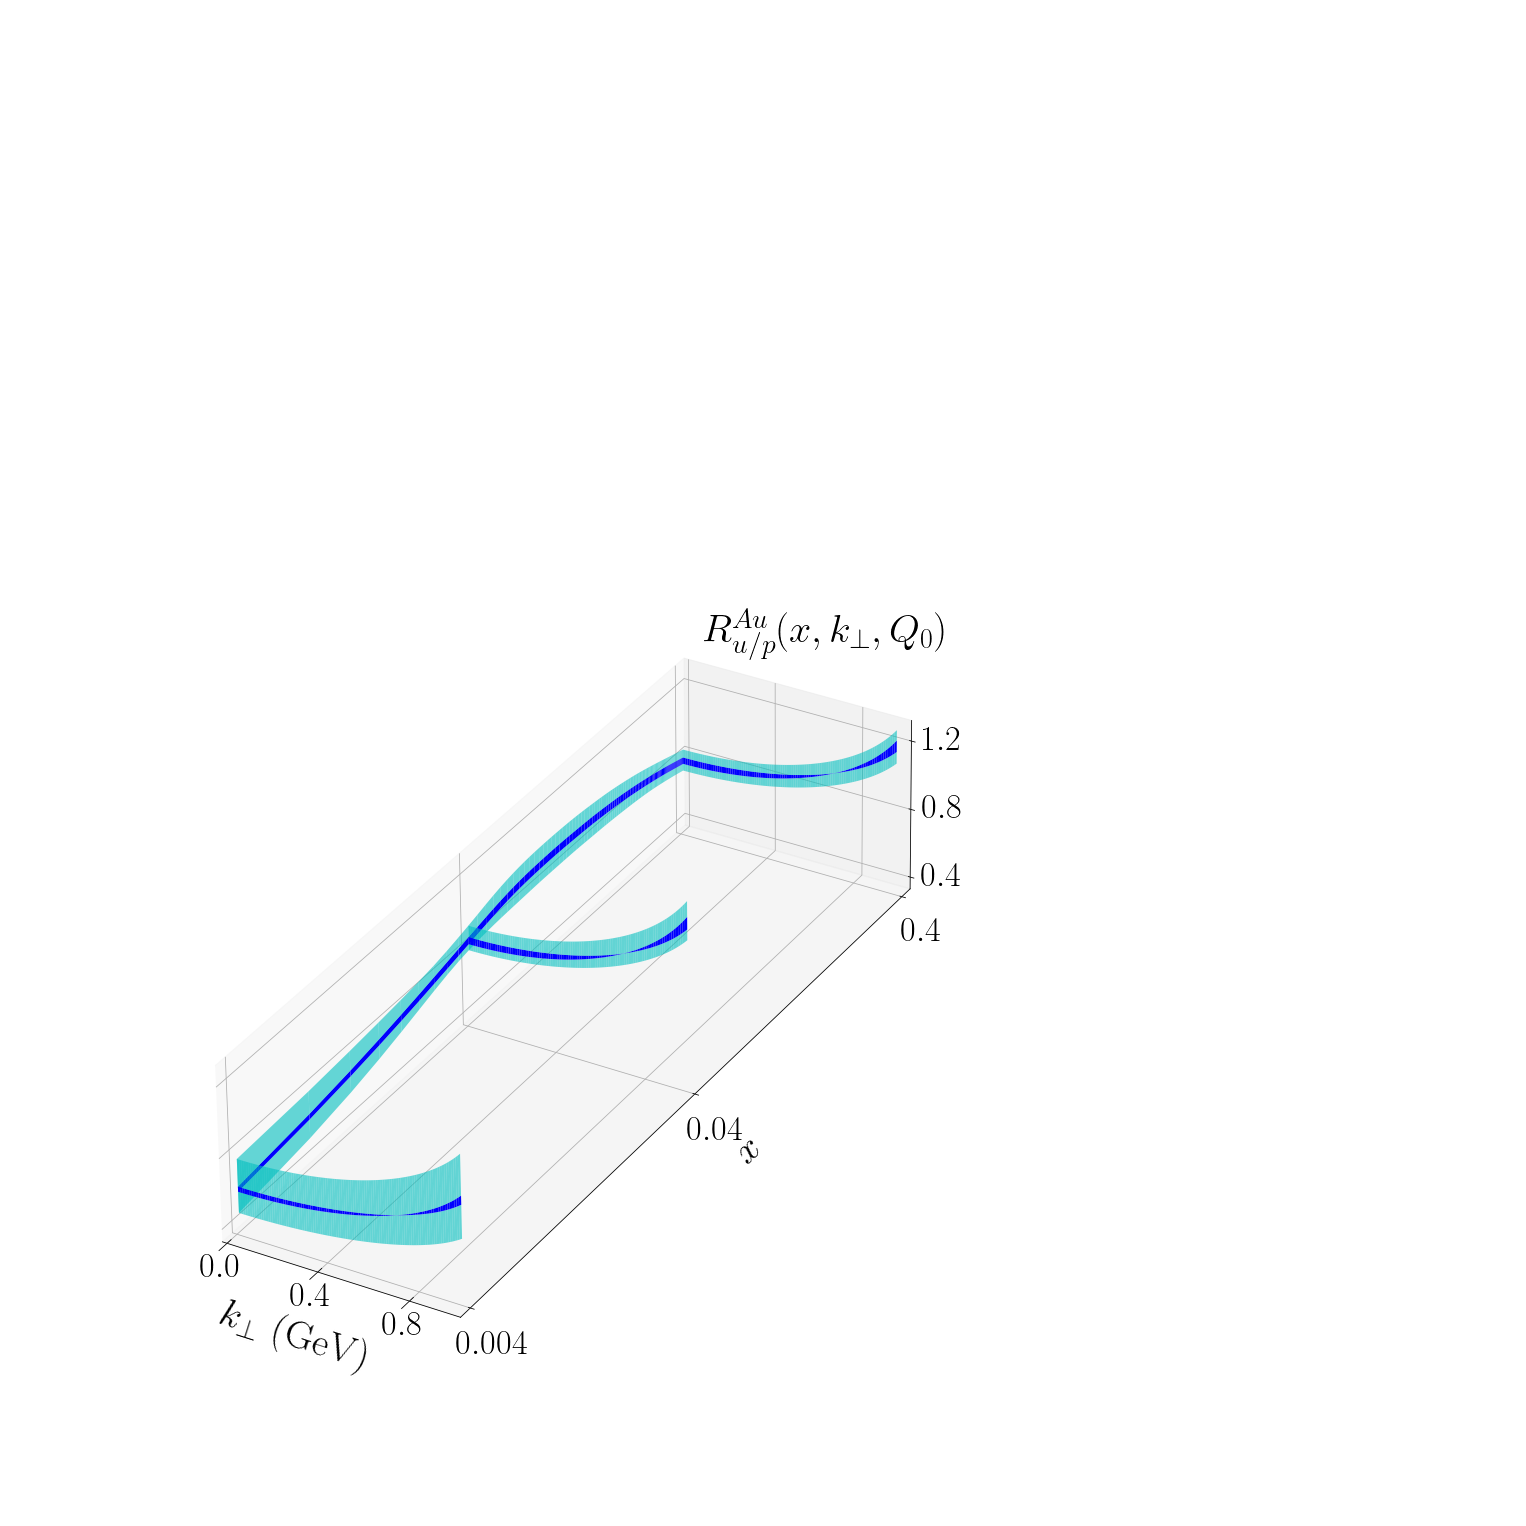

In [40]:
# Plotting part. Figure and axes creation.
fig = plt.figure(figsize=(14,14))
ax = fig.gca(projection='3d',xlim=(0.01,1),ylim = (np.log10(0.004),np.log10(0.4)),zlim=(0.35,1.3))
clr = 'blue'

ax.set_proj_type('persp')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.4*8, 1.35*8, 0.30*8,3]))
ax.view_init(azim=-61,elev=30)
ax.set_position([-1, 1, 1.5, 1.5])

clr = 'blue'
plot_3D_ratio(ax,PDF_X00_LOWQ2,u2,"kt",0.004,clr,1)
plot_3D_ratio(ax,PDF_X02_LOWQ2,u2,"kt",0.04,clr,1)
plot_3D_ratio(ax,PDF_X04_LOWQ2,u2,"kt",0.4,clr,1)
plot_3D_ratio_x(ax,PDF_KT00_LOWQ2,u2,"x",0.01,clr,0.404)

clr = 'c0'
plot_3D2(ax,PDF_X00_LOWQ2,u2,"kt",0.004,clr,1)
plot_3D2(ax,PDF_X02_LOWQ2,u2,"kt",0.04,clr,1)
plot_3D2(ax,PDF_X04_LOWQ2,u2,"kt",0.4,clr,1)
plot_3D_x2(ax,PDF_KT00_LOWQ2,u2,"x",0.01,clr,0.404)


Size = 40

ax.set_xlabel(r"\rm $k_\perp$ (GeV)", fontsize = Size, labelpad = 50)
ax.set_ylabel(r"\rm $x$", fontsize = Size, labelpad = 160)
ax.zaxis.set_rotate_label(False)
ax.tick_params(axis='z', pad=30)
ax.tick_params(axis='y', pad=60)
ax.tick_params(axis = 'both', direction ='in',labelsize = Size*30/35)


ax.set_xticks([0.0,0.4,0.8])
ax.set_yticks([np.log10(0.004),np.log10(0.04), np.log10(0.4)])
ax.set_yticklabels([r"\rm $0.004$",r"\rm $0.04$",r"\rm $0.4$"])

ax.set_zticks([0.4,0.8,1.2])


ax.dist = 35

props = dict(boxstyle='round', facecolor='white', alpha=0)


ax.text2D(0.46,0.580, r"\rm $R_{u/p}^{Au}(x,k_{\perp},Q_0)$", transform=ax.transAxes, size = Size)


fig.savefig("AU_PDF_LOWQ.pdf",bbox_inches = "tight",pad_inches = 0)



In [165]:
original = "AU_PDF_LOWQ.pdf"
target   = original[:-4] + '.proton.pdf'
left     = 180
top      = 600
right    = 540
bottom   = 150
pdf = PdfFileReader(open(original, 'rb'))
out = PdfFileWriter()
for page in pdf.pages:
    page.mediaBox.upperRight = (page.mediaBox.getUpperRight_x() - right, page.mediaBox.getUpperRight_y() - top)
    page.mediaBox.lowerLeft  = (page.mediaBox.getLowerLeft_x()  + left,  page.mediaBox.getLowerLeft_y()  + bottom)
    out.addPage(page)    
ous = open(target, 'wb')
out.write(ous)
ous.close()

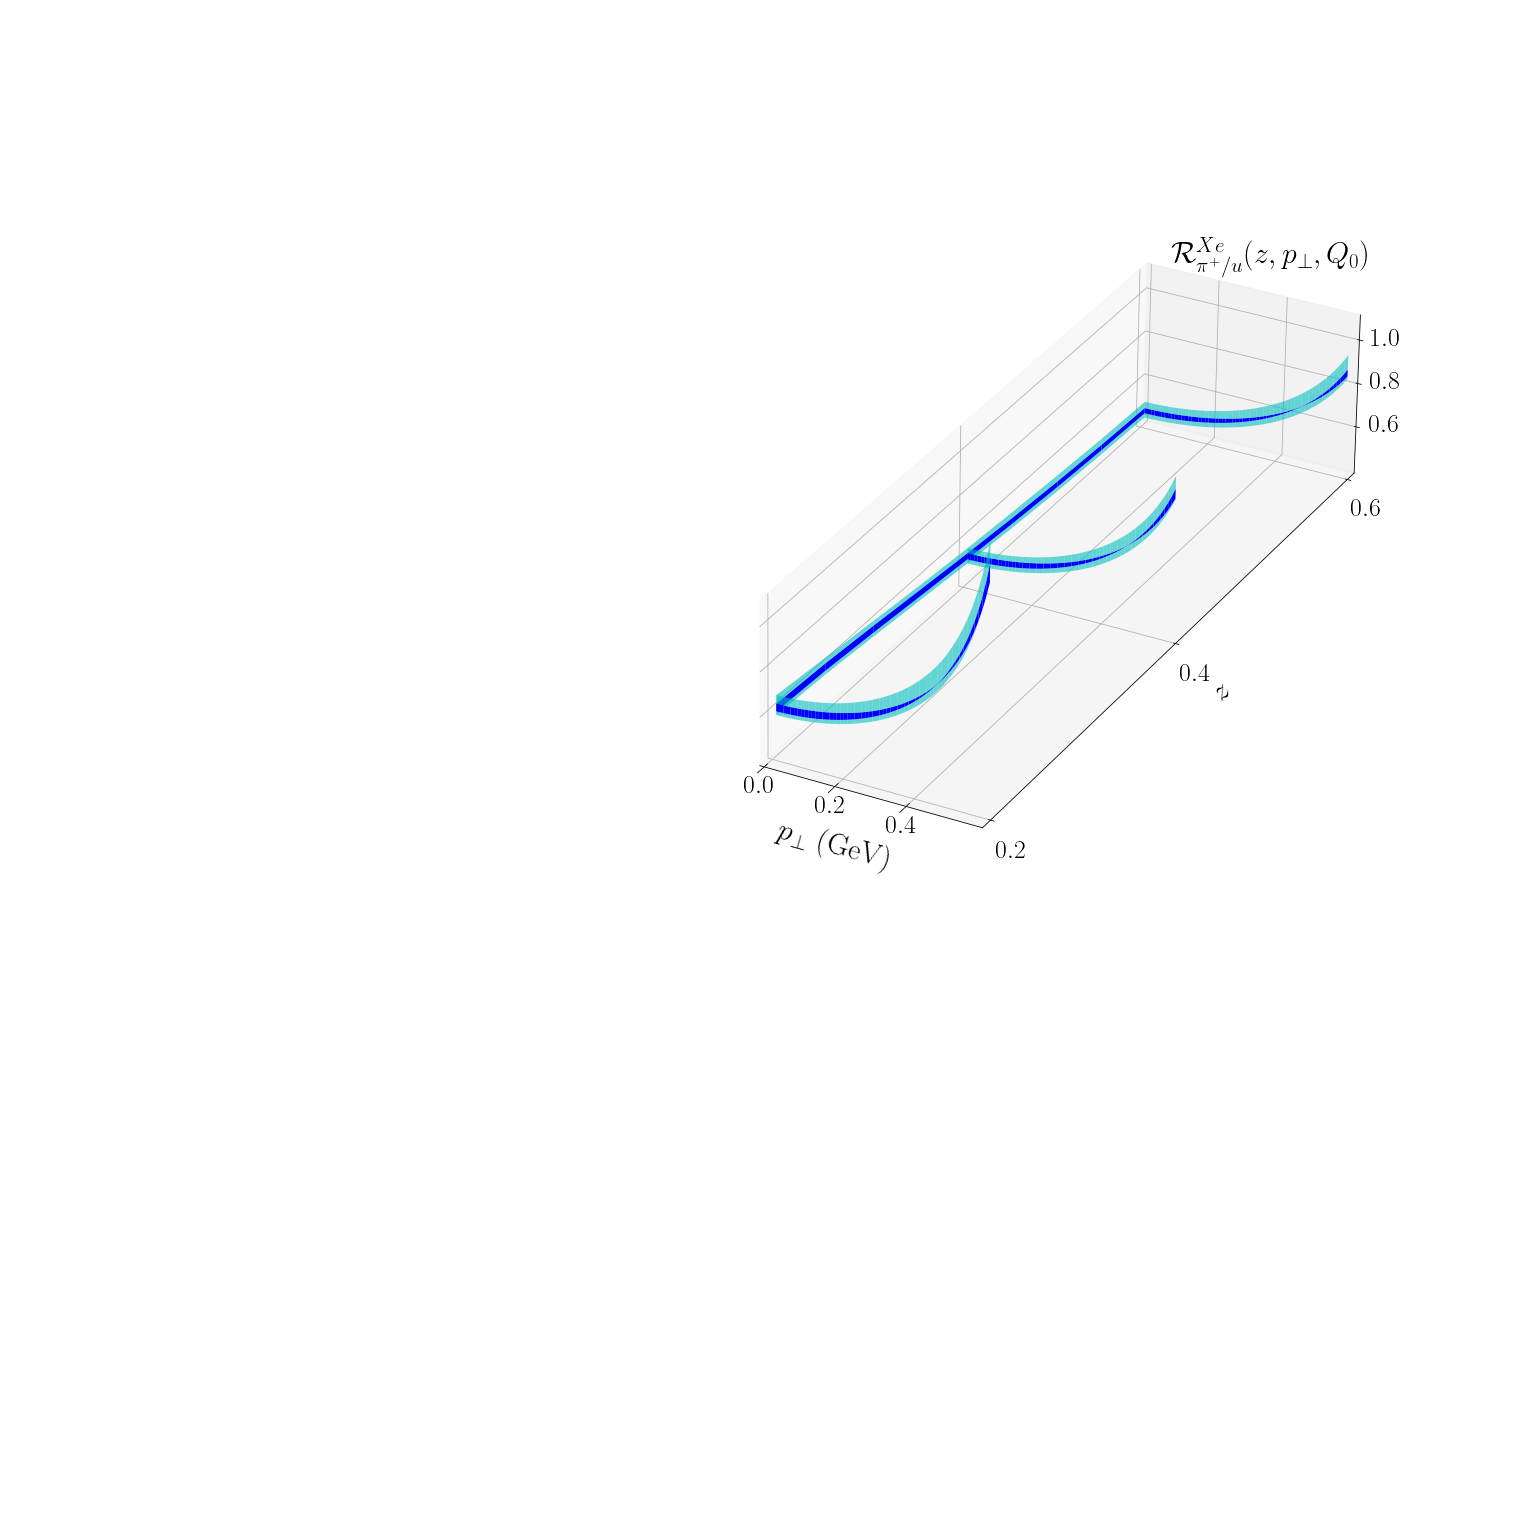

In [56]:
# Plotting part. Figure and axes creation.
fig = plt.figure(figsize=(14,14))
#ax = fig.add_subplot(111, projection='3d', xlim=(0.01,1), ylim=(0.0,0.6),zlim=(0.6,1.1))
ax = fig.gca(projection='3d',xlim=(0,0.6), ylim=(0.2,0.6),zlim=(0.4,1.1))
clr = 'blue'

ax.set_proj_type('persp')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.4*8, 1.35*8, 0.30*8,3]))
ax.view_init(azim=-61,elev=30)
ax.set_position([-1, 1, 1.5, 1.5])

clr = 'blue'
plot_3D_ratio3(ax,FF_X00_LOWQ2,u2,"pt",0.2,clr,0.6)
#plot_3D_ratio3(ax,FF_X03_LOWQ2,u2,"pt",0.3,clr,0.6)
plot_3D_ratio3(ax,FF_X05_LOWQ2,u2,"pt",0.4,clr,0.6)
plot_3D_ratio3(ax,FF_X07_LOWQ2,u2,"pt",0.6,clr,0.6)
plot_3D_ratio_x3(ax,FF_PT00_LOWQ2,u2,"z",0.01,clr,0.61)

clr = 'c0'
plot_3D23(ax,FF_X00_LOWQ2,u2,"pt",0.2,clr,0.6)
#plot_3D23(ax,FF_X03_LOWQ2,u2,"pt",0.3,clr,0.6)
plot_3D23(ax,FF_X05_LOWQ2,u2,"pt",0.4,clr,0.6)
plot_3D23(ax,FF_X07_LOWQ2,u2,"pt",0.6,clr,0.6)
plot_3D_x23(ax,FF_PT00_LOWQ2,u2,"z",0.01,clr,0.61)

Size = 30

ax.set_xlabel(r"\rm $p_\perp$ (GeV)", fontsize = Size, labelpad = 50)
ax.set_ylabel(r"\rm $z$", fontsize = Size, labelpad = 150)
ax.zaxis.set_rotate_label(False)
#ax.set_zlabel(r"\rm $R^{Xe}_{\pi^+/u}(z, p_\perp, Q_0)$", fontsize = Size,rotation = 0,labelpad =150)
ax.tick_params(axis='z', pad=30)
ax.tick_params(axis='y', pad=60)
ax.tick_params(axis = 'both', direction ='in',labelsize = Size*30/35)

ax.set_xticks([0,0.2,0.4])
ax.set_yticks([0.2,0.4,0.6])
ax.set_zticks([0.6,0.8,1.0])


ax.dist = 35

ax.text2D(0.77,0.83, r"\rm $\mathcal{R}^{Xe}_{\pi^+/u}(z, p_\perp, Q_0)$", transform=ax.transAxes, size = Size)


fig.savefig("XE_FF_LOWQ.pdf",bbox_inches = "tight",pad_inches = 0)



In [72]:
original = "XE_FF_LOWQ.pdf"
target   = original[:-4] + '.cropped.pdf'
left     = 640
top      = 450
right    = 350
bottom   = 550
pdf = PdfFileReader(open(original, 'rb'))
out = PdfFileWriter()
for page in pdf.pages:
    page.mediaBox.upperRight = (page.mediaBox.getUpperRight_x() - right, page.mediaBox.getUpperRight_y() - top)
    page.mediaBox.lowerLeft  = (page.mediaBox.getLowerLeft_x()  + left,  page.mediaBox.getLowerLeft_y()  + bottom)
    out.addPage(page)    
ous = open(target, 'wb')
out.write(ous)
ous.close()